# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

The following program plots the dataset n.1

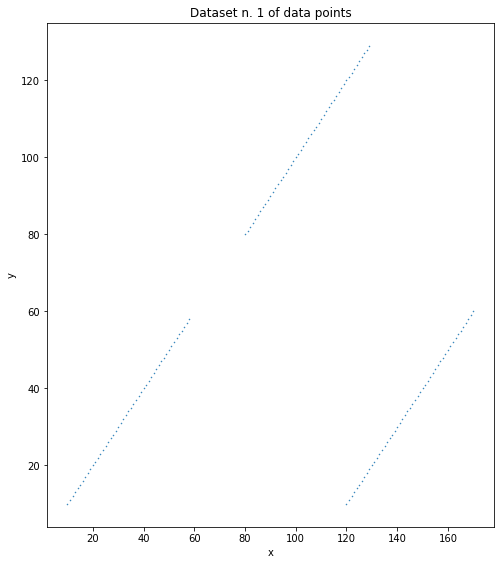

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

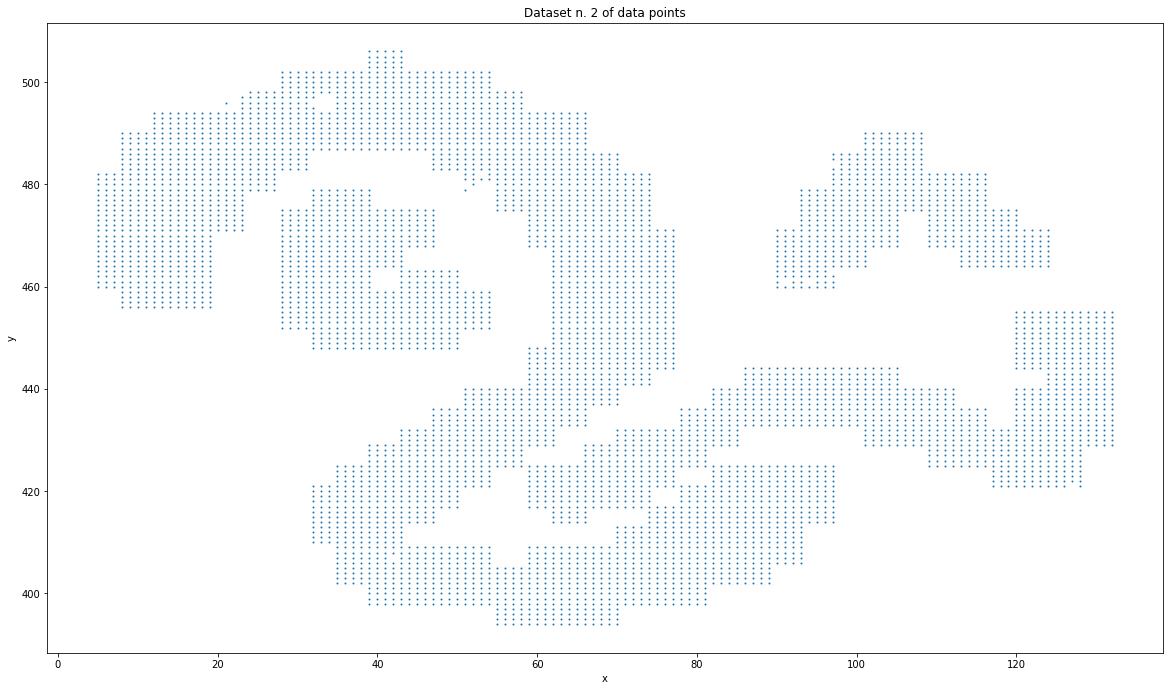

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

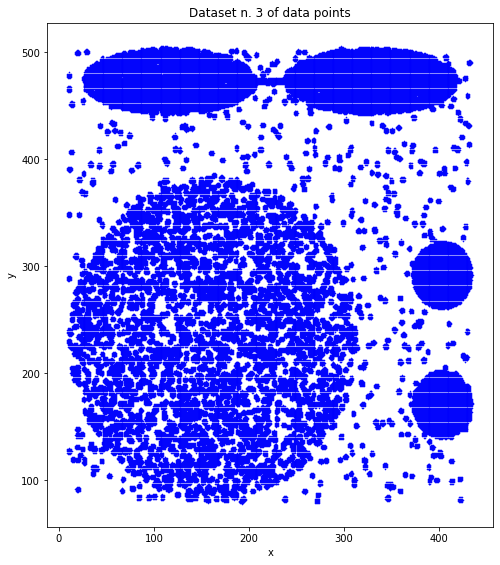

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

In the following program we plot the clusters

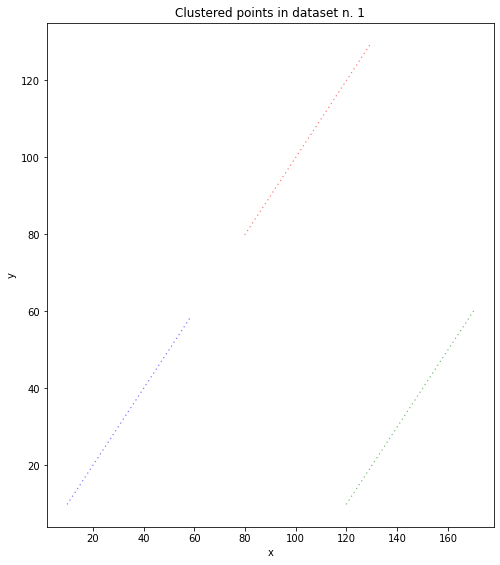

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

#(1) In the following cell I propose you to perform clustering with K-means on dataset2.

In [166]:
k=3
kmeans2 = KMeans(n_clusters=k)
kmeans2.fit(data2)

KMeans(n_clusters=3)

In the following you have to plot clustering results on dataset2.

**Answer:** how do you explain what it happens?

###**Risposta**: Individua i centroidi (rappresentati nel grafico e stampati i valori "centroids") e crea 3 cluster minimizzando la distanza tra i singoli centroidi andando quindi per ogni punto a vedere quale sia la distanza minima da ogni centroide ed assegnando il cluster del centroide più vicino al punto in questione

In [ ]:
plt.figure(figsize=(20,10))
data_x = []
data_y = []
colors = ['r', 'g', 'b']
m, j = 0, 1
centroids = kmeans2.cluster_centers_.ravel()
print("I centroidi sono: \n")
print(centroids)
print("\n")
for cluster in range(k): 
  for i in range(n_samples2): # ciclo su tutti gli esempi del dataset
    if kmeans2.labels_[i] == cluster: # se l'esempio i-esimo appartiene al cluster 
      # prendo l'esempio
      data_x.append(data2[i, 0]) 
      data_y.append(data2[i, 1])
  plt.scatter(data_x, data_y, c=colors[cluster], alpha=0.5, edgecolors='none', s=5)
  plt.scatter(centroids[m], centroids[j], c=colors[cluster])
  plt.annotate("Centroid {:}".format(cluster+1), (centroids[m], centroids[j]))
  #plt.show() #plotto gli esempi del cluster i-esimo e li coloro in base al cluster di appartenenza
  data_x = []
  data_y = []
  m = j+1
  j = m+1

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [168]:
k=5
kmeans3 = KMeans(n_clusters=k)
kmeans3.fit(data3)

KMeans(n_clusters=5)

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

###**Risposta:** In questo caso notiamo che per K=5 (numero di cluster che abbiamo supposto guardando il dataset) K-means va a splittare in 3 cluster (giallo,rosso e arancione) la parte del dataset dove immaginavamo ci fosse un unico cluster. Infatti possiamo vedere che in base ai centroidi trovati avremo questa rappresentazione: 

In [ ]:
plt.figure(figsize=(10,10))
data_x = []
data_y = []
colors = ['r', 'g', 'b', 'orange', 'yellow']
m, j = 0, 1
centroids = kmeans3.cluster_centers_.ravel()
print("I centroidi sono: \n")
print(centroids)
print("\n")
for cluster in range(k): 
  for i in range(n_samples3): # ciclo su tutti gli esempi del dataset
    if kmeans3.labels_[i] == cluster: # se l'esempio i-esimo appartiene al cluster 
      # prendo l'esempio
      data_x.append(data3[i, 0]) 
      data_y.append(data3[i, 1])
  plt.scatter(data_x, data_y, c=colors[cluster], alpha=0.5, edgecolors='none', s=5)
  plt.scatter(centroids[m], centroids[j], c=colors[cluster])
  plt.annotate("Centroid {:}".format(cluster+1), (centroids[m], centroids[j]))
  #plt.show() #plotto gli esempi del cluster i-esimo e li coloro in base al cluster di appartenenza
  data_x = []
  data_y = []
  m = j+1
  j = m+1

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

Eseguiamo K_Means 10 volte

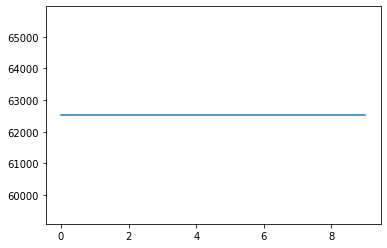

In [170]:
sum_of_dist = {}
for i in range(0, 10):
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(data1)
  sum_of_dist[i] = kmeans.inertia_
n_clusters = list(sum_of_dist.keys())
distances = list(sum_of_dist.values())
plt.plot(n_clusters, distances)

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

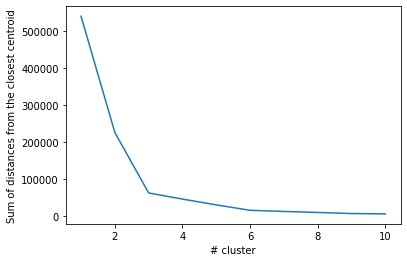

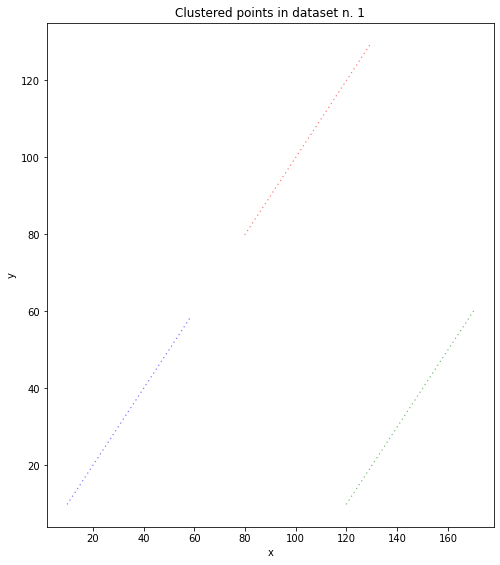

In [ ]:
sum_of_dist = {}
for cluster in range(1, 11):
  kmeans = KMeans(n_clusters=cluster, random_state=0)
  kmeans.fit(data1)
  sum_of_dist[cluster] = kmeans.inertia_
n_clusters = list(sum_of_dist.keys())
distances = list(sum_of_dist.values())
plt.plot(n_clusters, distances)
plt.xlabel("# cluster")
plt.ylabel("Sum of distances from the closest centroid")
plt.show()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

Dal grafico si evince che la distanza dimunuisce all'aumentare dei cluster, tuttavia ciò non vuol dire necessariamente che ci sia un miglioramento delle performance. Infatti, se osserviamo i punti presenti nel primo dataset ci rendiamo conto che ci sono tre cluster, pertanto K=3 è il valore ottimale in quanto separa i punti correttamente e minimizza la distanza senza overfittare

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

Usiamo DBSCAN sul Dataset2 (visto che DBSCAN è più usato per dataset frastagliati, irregolari)

[0 1 2 3 4 5 6]


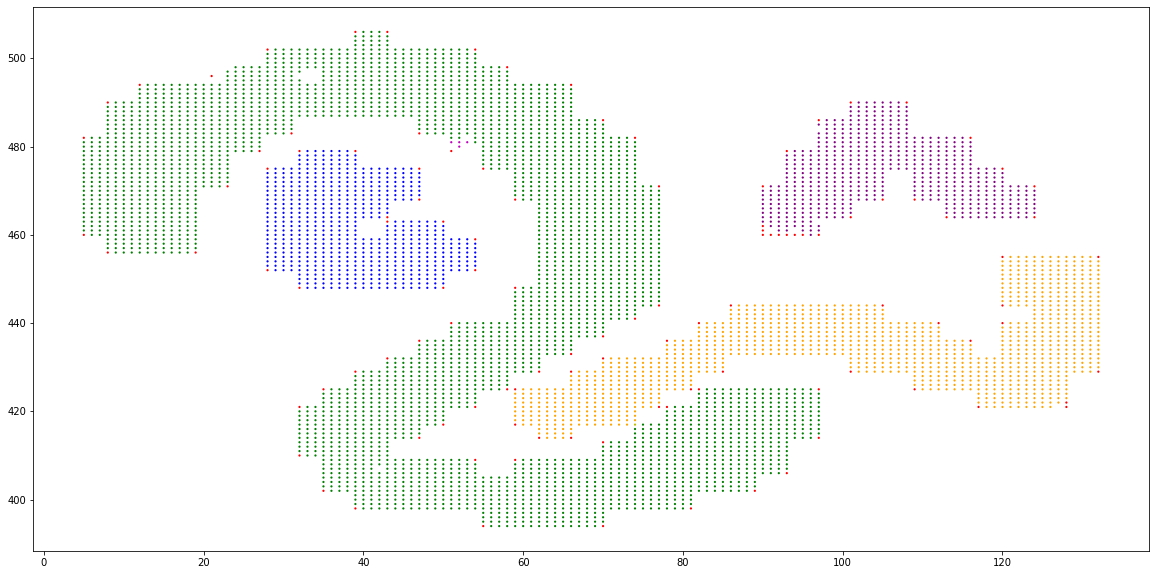

In [213]:
import numpy as np
from sklearn.cluster import DBSCAN

#for epsilon in np.arange(0.1, 10, 0.1): #ciclo epsilon da 0.1 a 10 per provarli
dbscan = DBSCAN(eps=1.3)
dbscan.fit(data2)

clusters = np.unique(dbscan.labels_)+1
  #if len(clusters.tolist())==7: #noto che con epsilon compreso tra 1 e 1.4 ottengo un risultato performante, metto quindi per esempio epsilon a 1.3
   # print(epsilon)
plt.figure(figsize=(20,10))
data_x = []
data_y = []
colors =['r','g','b','m','orange','y','purple']
print(clusters)
for cluster in clusters:
  for i in range(n_samples2): # ciclo su tutti gli esempi del dataset
    if dbscan.labels_[i] == cluster-1: # se l'esempio i-esimo appartiene al cluster 
      # prendo l'esempio
      data_x.append(data2[i, 0]) 
      data_y.append(data2[i, 1])
  plt.scatter(data_x, data_y, c=colors[cluster], alpha=1, edgecolors='none', s=5)
  #plt.show() #plotto gli esempi del cluster i-esimo e li coloro in base al cluster di appartenenza
  data_x = []
  data_y = [] 

Con **epsilon** da 1 a 1.4 (cioe, distanza minimia per far si che un esempio appartenga ad un cluster) notiamo che vengono distinti 4 principali cluster con dei punti rumorosi (rossi e arancioni) 

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

#(1)

In [198]:
from sklearn.cluster import DBSCAN
#class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)[source]¶
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(data2)


DBSCAN(eps=2, min_samples=10)

0
1
2
3


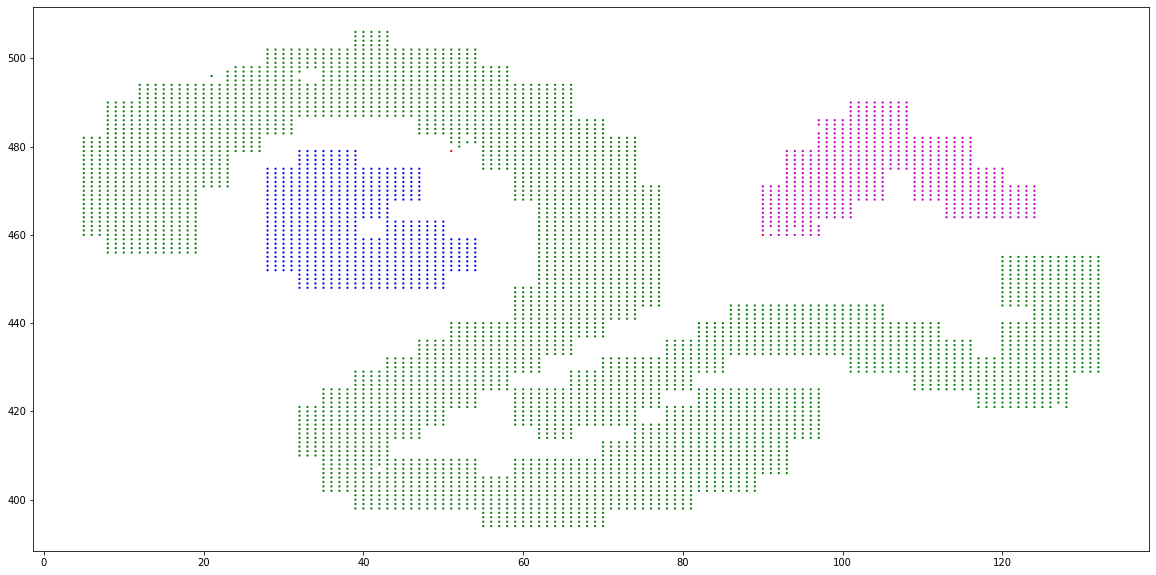

In [199]:
plt.figure(figsize=(20,10))
data_x = []
data_y = []
colors =['r','g','b','m','orange','y','purple']
clusters = np.unique(dbscan.labels_)+1
for cluster in clusters: 
  print(cluster)
  for i in range(n_samples2): # ciclo su tutti gli esempi del dataset
    if dbscan.labels_[i] == cluster-1: # se l'esempio i-esimo appartiene al cluster 
      # prendo l'esempio
      data_x.append(data2[i, 0]) 
      data_y.append(data2[i, 1])
  plt.scatter(data_x, data_y, c=colors[cluster], alpha=1, edgecolors='none', s=5)
  #plt.show() #plotto gli esempi del cluster i-esimo e li coloro in base al cluster di appartenenza
  data_x = []
  data_y = []

#(2)

Calcoliamo la distanza tra un esempio $x_i$ e tutti gli esempi $x_j$ $i=1, \dots ,N$ e $j \neq i$ --> $dist(x_i, x_j)$

In [200]:
import numpy as np

def euclidean_dist(xi, xj):
    return np.linalg.norm(xi - xj)

In [201]:
dist = {} # dist(x_i, x_j)
for i in range(len(data2)):
    distances = []
    for j in range(len(data2)):
        if(i!=j):
            distances.append(euclidean_dist(data2[i], data2[j]))
    dist[i] = sorted(distances)[9] # prendiamo il decimo esempio più vicino a x_i
    distances = []

#(3)

In [202]:
sorted_dist = sorted(dist.values()) #ordiniamo tutte le decime distanze

#(4-5)

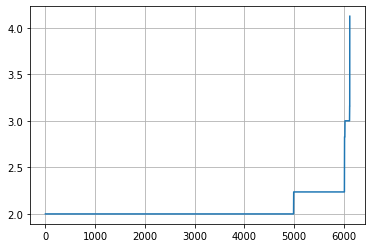

In [211]:
plt.plot(np.arange(n_samples2), sorted_dist) #plotto il sort delle distanze
plt.grid(True)

Il miglior epsilon è circa 2.23 infatti è dove nel grafico delle distanze si crea il "gomito" 

#(6)

In [209]:
from sklearn.cluster import DBSCAN
#class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)[source]¶
optimal_eps = sorted_dist[5999] #epsilon ottimo che si trova (come si vede dal grafico in precedenza, nel punto 6000)
dbscan = DBSCAN(eps=optimal_eps, min_samples=10)
dbscan.fit(data2)

DBSCAN(eps=2.23606797749979, min_samples=10)

1
2
3


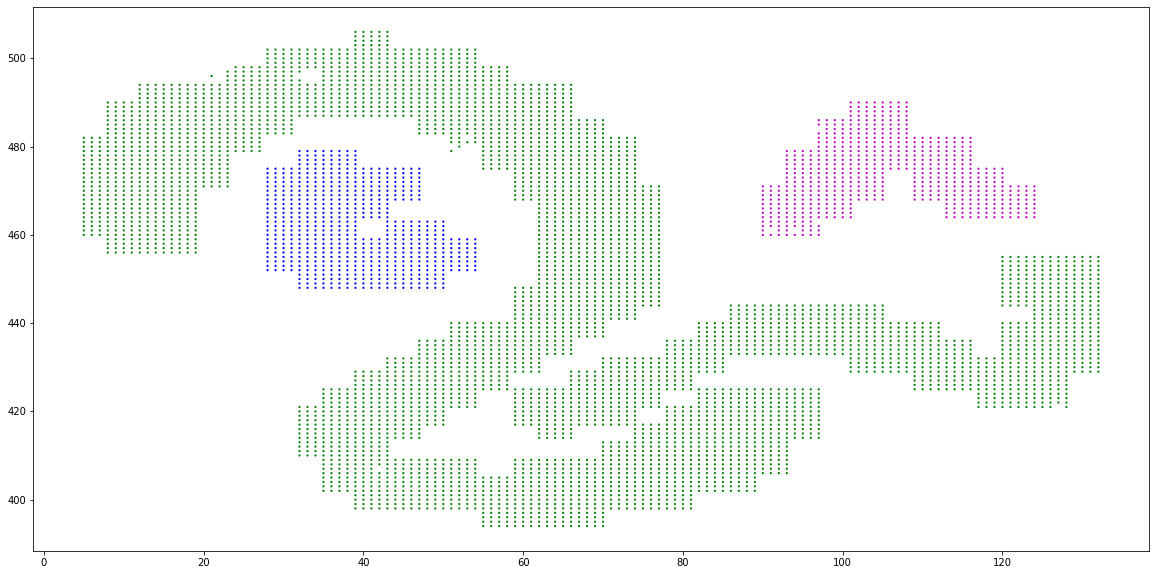

In [212]:
plt.figure(figsize=(20,10))
data_x = []
data_y = []
colors =['orange','g','b','m','r','y','purple']
clusters = np.unique(dbscan.labels_)+1
for cluster in clusters: 
  print(cluster)
  for i in range(n_samples2): # ciclo su tutti gli esempi del dataset
    if dbscan.labels_[i] == cluster-1: # se l'esempio i-esimo appartiene al cluster 
      # prendo l'esempio
      data_x.append(data2[i, 0]) 
      data_y.append(data2[i, 1])
  plt.scatter(data_x, data_y, c=colors[cluster], alpha=1, edgecolors='none', s=5)
  #plt.show() #plotto gli esempi del cluster i-esimo e li coloro in base al cluster di appartenenza
  data_x = []
  data_y = []

Utilizzando un epsilon ottimo (2.23) i cluster vengono individiati in maniera coerente, infatti non vediamo punti rumorosi che in base a come abbiamo deciso in precedenza dovebbrero essere di colore arancione (primo colore della lista)